## Intro

This project is inspired from the first data science case study of Udemy's Data Science for Business course. It is quite basic as it covers only some aspects of data visualisation, categorical data encoding, and some model fittings.

The point of the project is to improve the performance of the HR department of a company by predicting whether an employee is likely to leave based on variables such as salary, work/life balance etc.

## Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
employee_df = pd.read_csv("Human_Resources.csv")

In [3]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Visualisation

Let's begin by replacing each binary categorical variables with a boolean.

In [6]:
# Let's replace 'Attrition' , 'OverTime' , 'Over18' column
employee_df["Attrition"] = employee_df["Attrition"].apply(lambda x:1 if x == 'Yes' else 0)
employee_df["OverTime"] = employee_df["OverTime"].apply(lambda x:1 if x == 'Yes' else 0)
employee_df["Over18"] = employee_df["Over18"].apply(lambda x:1 if x == 'Yes' else 0)

In [7]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Fast check for missing data, a missing data should appear as in another colour.

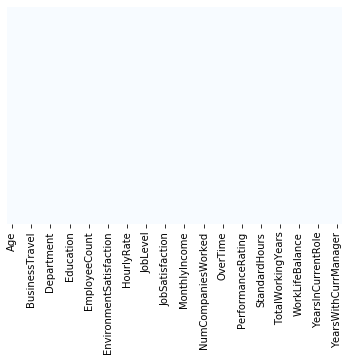

In [8]:
sns.heatmap(employee_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

Let's make a histogram for each of the features in order to get a visual idea of the distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C9613EF48>,
      dtype=object)

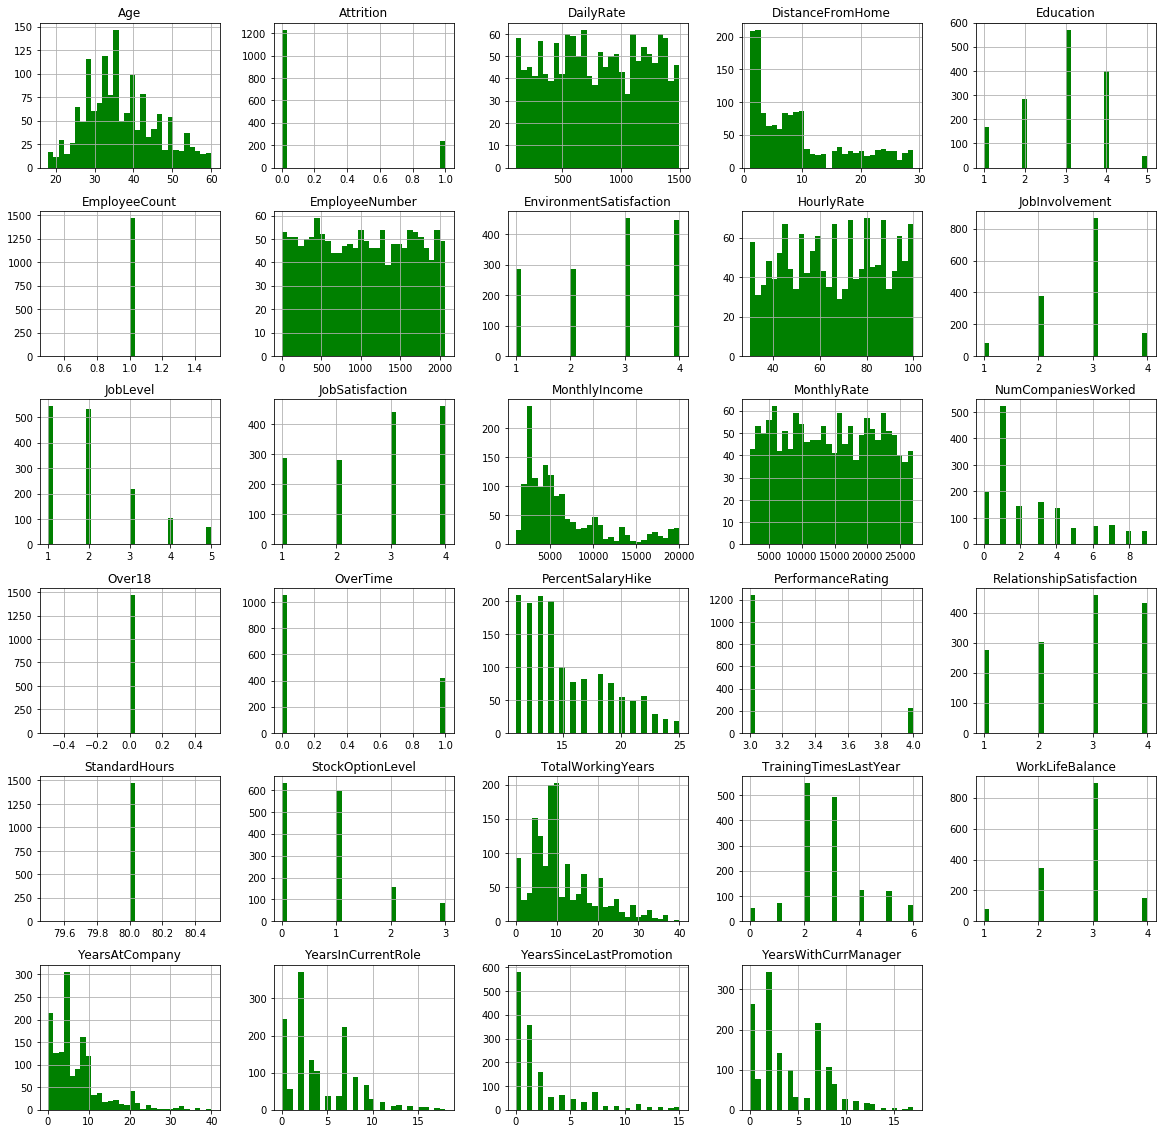

In [9]:
employee_df.hist(bins = 30, figsize = (20,20), color = 'g')

Unbalanced dataset: we see many of the employees stayed in the company (Attrition = 1).  
Everything else fits common sense. Nothing surprising.

However, there are a few constants we can drop : 'EmployeeCount', 'StandardHours' and 'Over18'.

In [10]:
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis = 1, inplace = True)

Now let's see how many employees left and/or stayed in the company.

In [11]:
left_df = employee_df[employee_df["Attrition"] == 1]
stayed_df = employee_df[employee_df["Attrition"] == 0]

In [12]:
print('Total = ', len(employee_df))

print('Number of employees who left = ', len(left_df))
print('Percentage of employees who left = ', (len(left_df)/len(employee_df))*100,'%')

print('Number of employees who stayed = ', len(stayed_df))
print('Percentage of employees who stayed = ', (len(stayed_df)/len(employee_df))*100,'%')

Total =  1470
Number of employees who left =  237
Percentage of employees who left =  16.122448979591837 %
Number of employees who stayed =  1233
Percentage of employees who stayed =  83.87755102040816 %


Now let's see the difference between the typical values of each group.

In [13]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,1010.345992,2.464135,65.573840,2.518987,1.637131,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,580.750572,1.169791,20.099958,0.773405,0.940594,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,514.000000,1.000000,50.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,1017.000000,3.000000,66.000000,3.000000,1.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,1486.000000,4.000000,84.000000,3.000000,2.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,2055.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [14]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,1027.656123,2.771290,65.952149,2.770479,2.145985,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,606.217074,1.071132,20.380754,0.692050,1.117933,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,2.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,483.000000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,1022.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,1574.000000,4.000000,83.000000,3.000000,3.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


It seems that the employees who stay are older on average. At the same time, they have a higher average salary.  
Not a great difference for the distance from home.
Stock option is also very different.  
  
There are many differences between the two groups. Let's check for correlations.

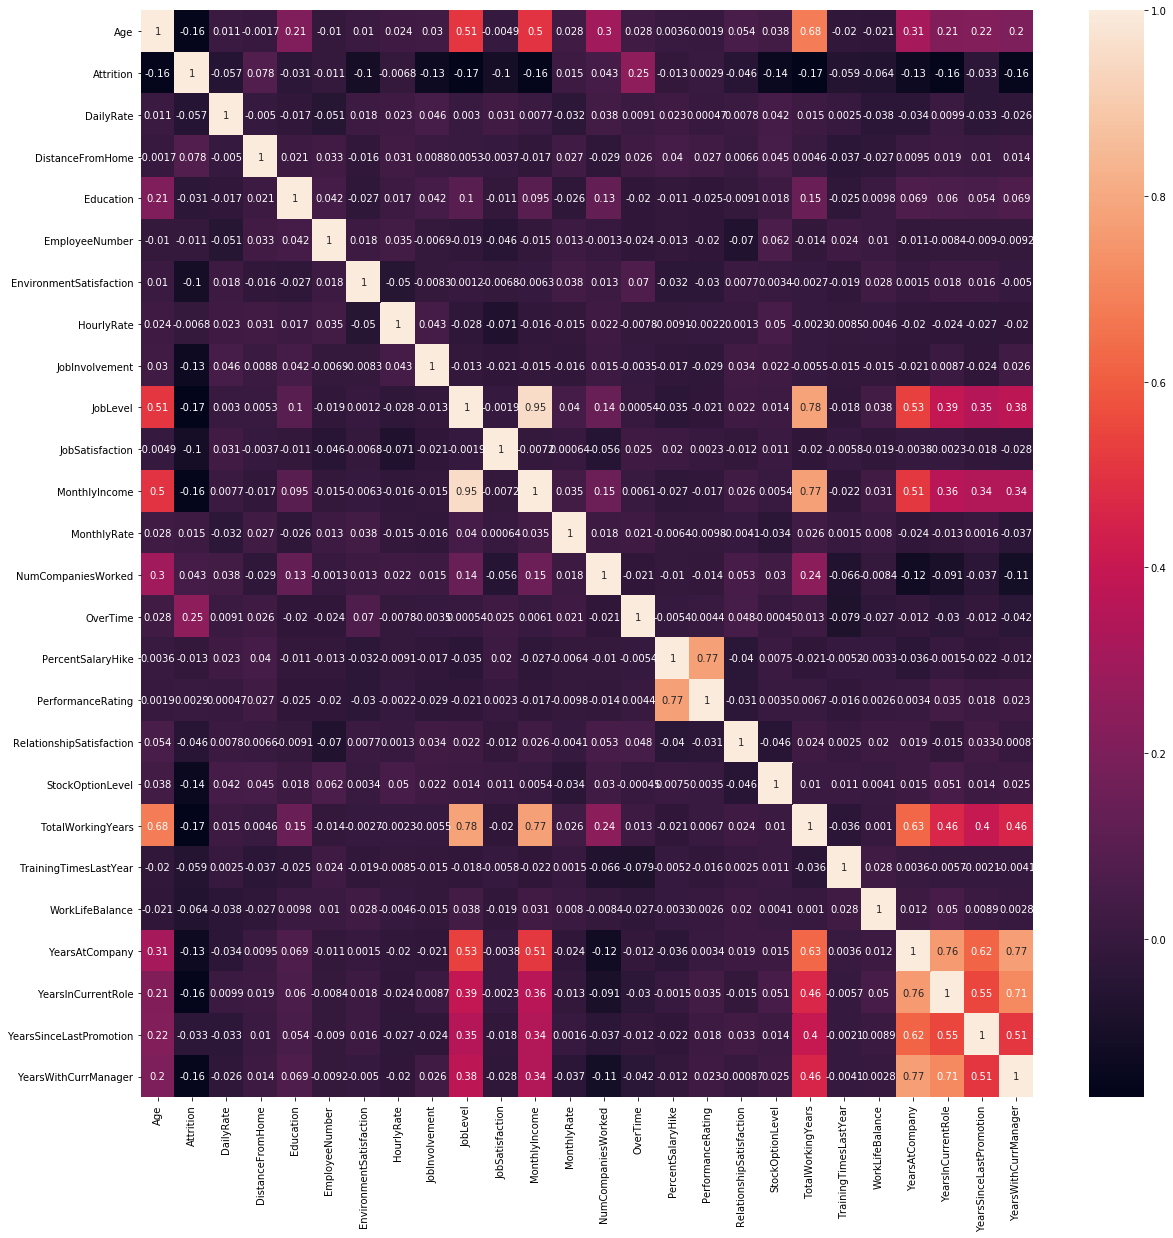

In [15]:
correlations = employee_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True)

We can spot a few high correlations that make sense: a high job level is correlated with the total working years of the employee. Same goes for total working years and monthly income: as the employee gets more senior, his salary increases. Age is also strongly correlated with monthly income.  

Basically, we see that the more experienced one makes more money.

Let's see if there is a relationship between the age and the attrition of the employee.

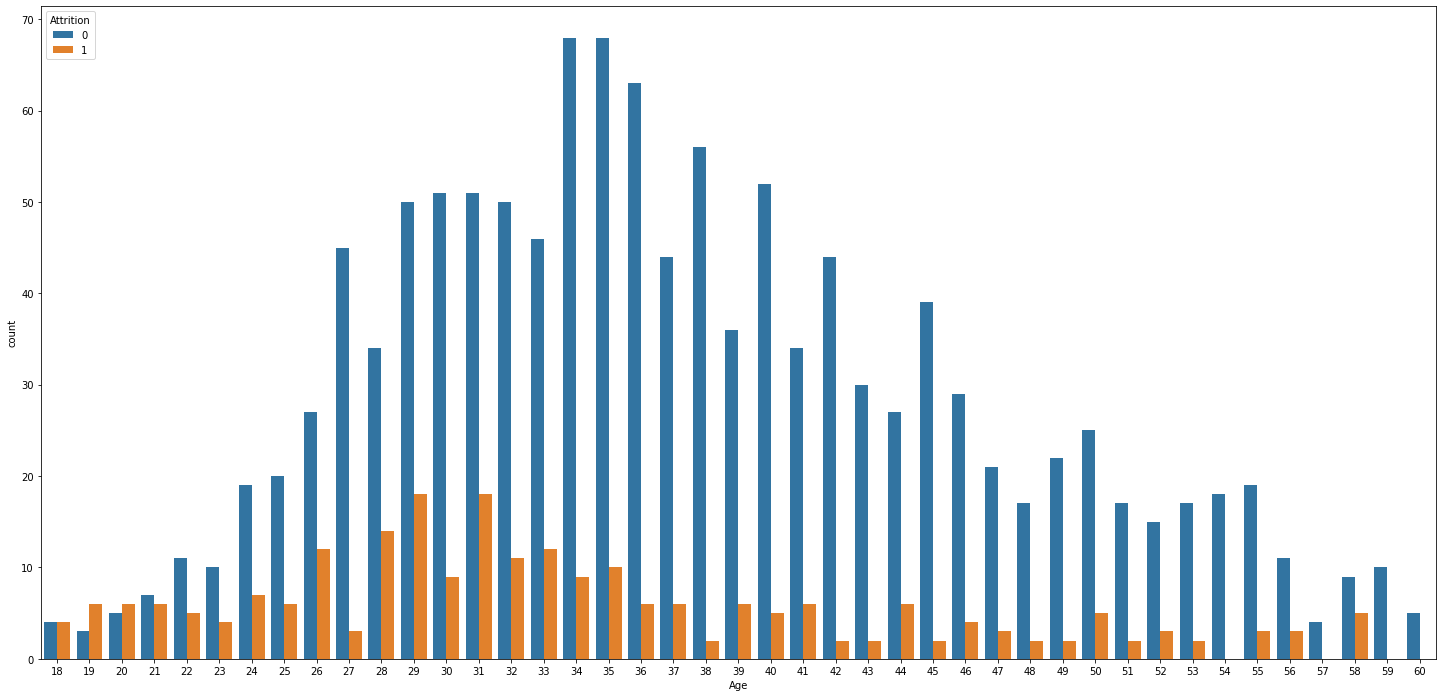

In [16]:
plt.figure(figsize = [25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)

It seems that the breaking point is around 28: this is where employees have the highest probability of leaving. Maybe they want to explore more, maybe they want a higher salary, maybe they want to be closer to their home...  

In any case, age seems to be a factor for the prediction.

Let's look at the other variables.

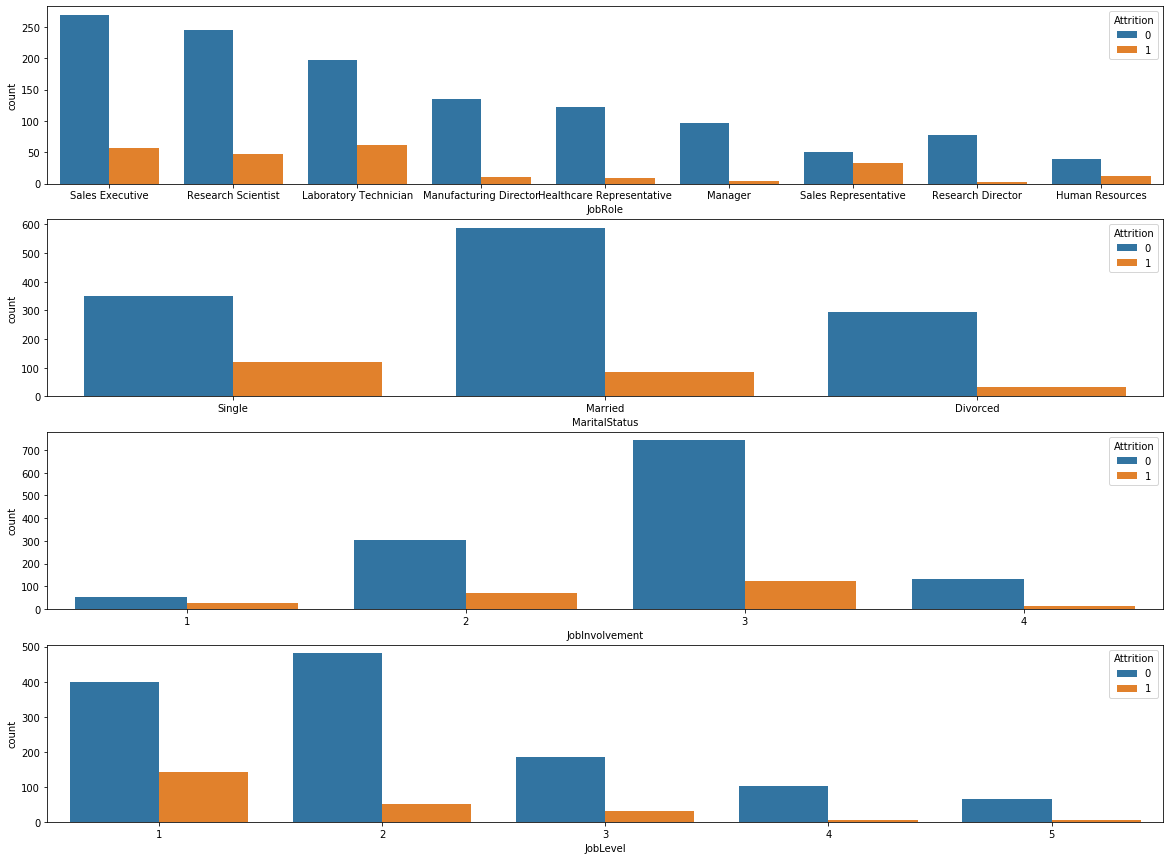

In [17]:
plt.figure(figsize = [20,15])

plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)

plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)

plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)

plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)

JobRole: We can see that a few positions have a higher attrition than other ones, such as the Sales Representative. Nearly than half of the employees have left. On the other hand, Research Director has very little attrition. There is a link between the Job Role and the attribution.

Marital Status: It seems that single employees leave more than others.

Job Involvement: Those who had a low job involvement have a very high proportion of employees who left.

Job Level: Juniors are often here to gain experience or explore, which is why it has the highest proportion of employees who left.

### Other data exploration with advanced tools

Let's use a KDE to visualize the probability density of the DistanceFromHome for left and stayed emlpoyees.

Text(0.5, 0, 'Distance From Home')

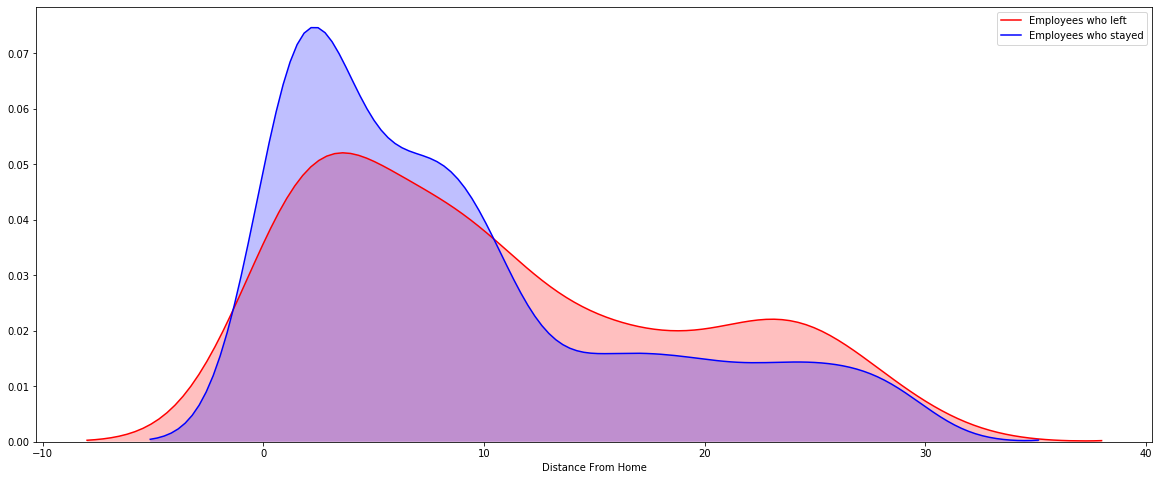

In [18]:
plt.figure(figsize = (20,8))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who stayed', shade = True, color = 'b')

plt.xlabel('Distance From Home')

As the distance increases, the number of employees who tend to leave gets higher than the ones who stayed. There might be a correlation.

Let's try with a different variable: YearsWithCurrManager

Text(0.5, 0, 'Years With Current Manager')

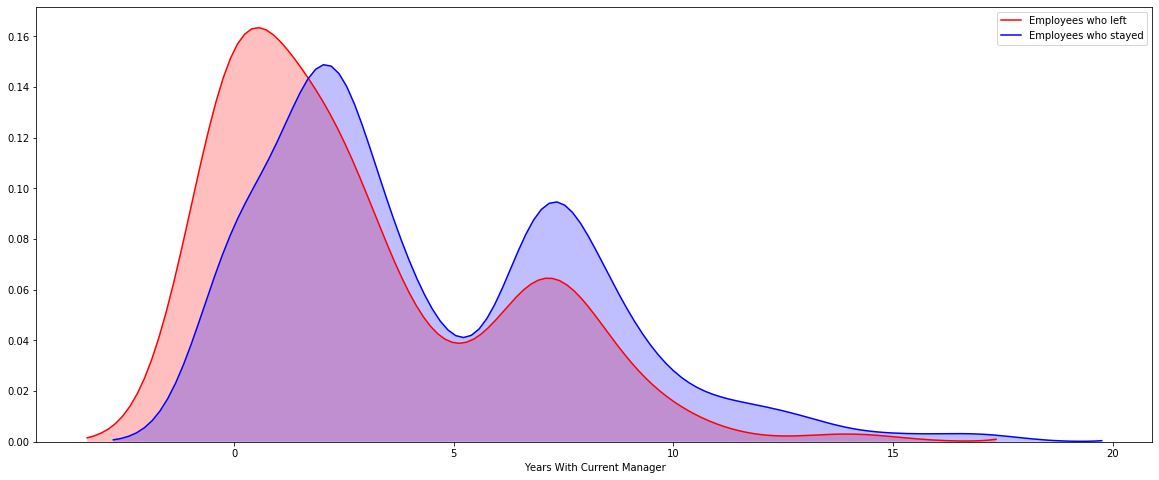

In [19]:
plt.figure(figsize = (20,8))

sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who stayed', shade = True, color = 'b')

plt.xlabel('Years With Current Manager')

In general, employees tend to leave more when they didn't spend a long time with the current manager. On the other hand, it seems that the employees who worked for more than 5 years with the same manager are less likely to leave, as the blue curve is above the red one.

And now TotalWorkingYears;

Text(0.5, 0, 'Total Working Years')

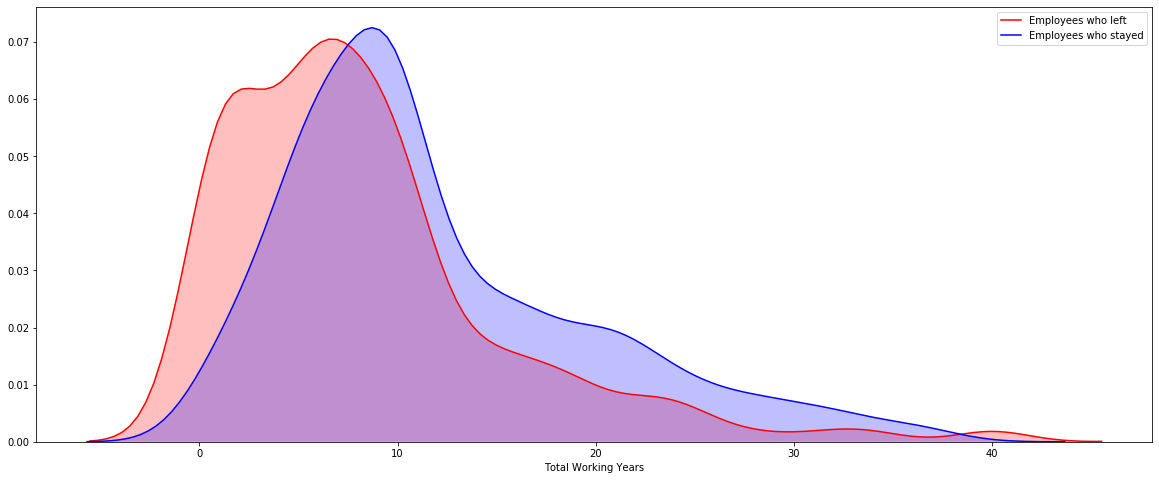

In [20]:
plt.figure(figsize = (20,8))

sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees who stayed', shade = True, color = 'b')

plt.xlabel('Total Working Years')

A higher amount of employees have left with 0-7 years of total working years, whereas it is the opposite beyond that threshold.

#### Monthly income?

Let's do some boxplots now, to see the link between monthly income and other variables.

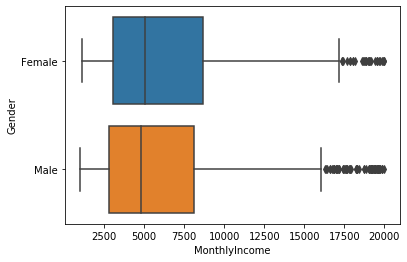

In [21]:
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df)

No real wage gap here, not much of a difference. The company is fair here.

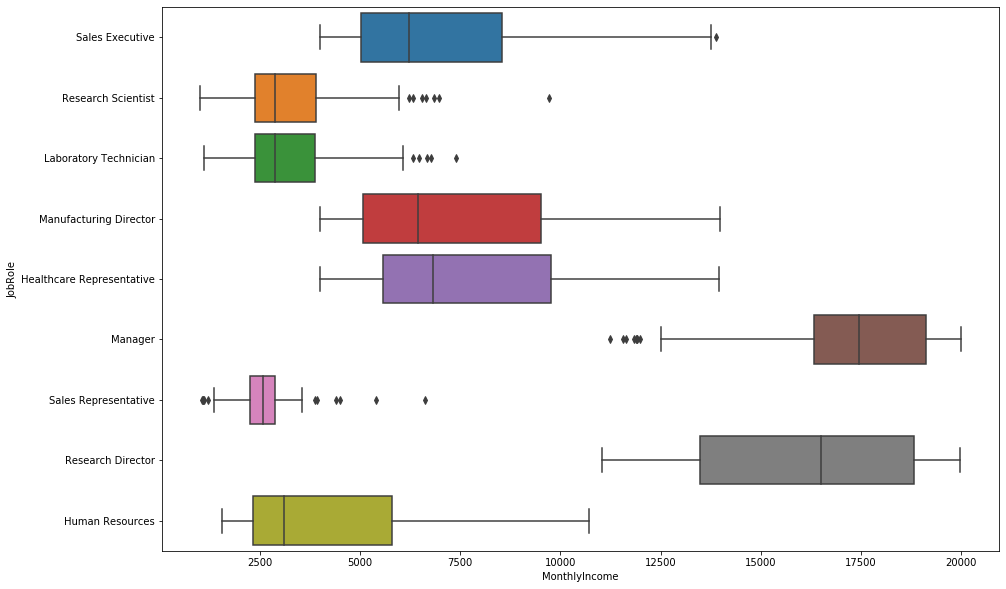

In [22]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df)

It seems that managers and research directors are paid a lot more, while scientists are paid a lot less.

## Data preparation

In [23]:
employee_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0


We will isolate the categorical variables from the numerical ones and perform a one-hot encoding.

In [33]:
X_cat = employee_df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]

In [34]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [35]:
from sklearn.preprocessing import OneHotEncoder
onehotencorder = OneHotEncoder()
X_cat = onehotencorder.fit_transform(X_cat).toarray()

In [38]:
X_cat.shape

(1470, 26)

In [39]:
X_cat = pd.DataFrame(X_cat)

In [40]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Let's work on the numerical data now.

In [41]:
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [42]:
X_all = pd.concat([X_cat,X_numerical], axis = 1)

In [43]:
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


We can notice some differences in the value ranges: the categorical variables are between 0 an d 1 while the daily rate can go up to 1300. We therefore need to scale the data.

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [45]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

Now let's define the target variable.

In [46]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Build the model

For this study, we will take a look at three different classifiers: Logistic regression, Random Forest and a neural network.

### Logistic regression

Let's do a train test split.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [48]:
X_train.shape

(1102, 50)

In [49]:
X_test.shape

(368, 50)

Now we can define the model and fit it to the dataset to predict values for y_pred.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [55]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

Now we can measure the performance of our model.

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 87.5 %


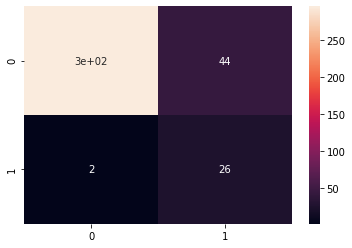

In [57]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

We misclassified 46 employees out of 368. This is a pretty good result.

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       298
           1       0.93      0.37      0.53        70

    accuracy                           0.88       368
   macro avg       0.90      0.68      0.73       368
weighted avg       0.88      0.88      0.85       368



### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

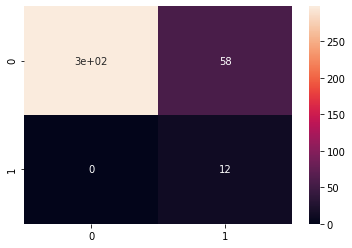

In [62]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       298
           1       1.00      0.17      0.29        70

    accuracy                           0.84       368
   macro avg       0.92      0.59      0.60       368
weighted avg       0.87      0.84      0.79       368



Seems like the results aren't as good as with the logistic regression here. The recall is especially bad.

### ANN

Let's build a neural network classifier with tensorflow.

In [70]:
import tensorflow as tf

Let's build our model with 4 layers. We will use relu for the hidden layers and a sigmoid for the output layer (because it's a binary classification).

In [71]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               25500     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


Now let's compile the model with an Adam optimizer on the accuracy, and the cross entropy as the loss function.

In [74]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

We can now train our model.

In [75]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4176 - accuracy: 0.8485
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3468 - accuracy: 0.8675
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3164 - accuracy: 0.8711
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2773 - accuracy: 0.9002
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2391 - accuracy: 0.9183
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2146 - accuracy: 0.9174
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1777 - accuracy: 0.9347
Epoch 8/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1654 - accuracy: 0.9338
Epoch 9/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1118 - accuracy: 0.9619
Epoch 10/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0765 - accuracy: 0.9764
Epoch 11/

23/23 [==============================] - 0s 6ms/step - loss: 9.1938e-06 - accuracy: 1.0000
Epoch 81/100
23/23 [==============================] - 0s 6ms/step - loss: 8.8292e-06 - accuracy: 1.0000
Epoch 82/100
23/23 [==============================] - 0s 6ms/step - loss: 8.4551e-06 - accuracy: 1.0000
Epoch 83/100
23/23 [==============================] - 0s 6ms/step - loss: 8.0735e-06 - accuracy: 1.0000
Epoch 84/100
23/23 [==============================] - 0s 6ms/step - loss: 7.7801e-06 - accuracy: 1.0000
Epoch 85/100
23/23 [==============================] - 0s 6ms/step - loss: 7.4203e-06 - accuracy: 1.0000
Epoch 86/100
23/23 [==============================] - 0s 6ms/step - loss: 7.1372e-06 - accuracy: 1.0000
Epoch 87/100
23/23 [==============================] - 0s 6ms/step - loss: 6.8642e-06 - accuracy: 1.0000
Epoch 88/100
23/23 [==============================] - 0s 6ms/step - loss: 6.5642e-06 - accuracy: 1.0000
Epoch 89/100
23/23 [==============================] - 0s 6ms/step - loss: 6.3

Let's test it.

In [76]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [77]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [

Now let's see how well the loss did throughout the training epochs.

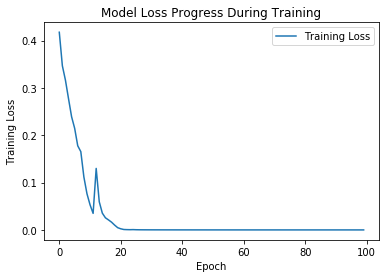

In [78]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

The loss decreased to almost 0 at around 20 epochs which is great.

Let's see for the accuracy.

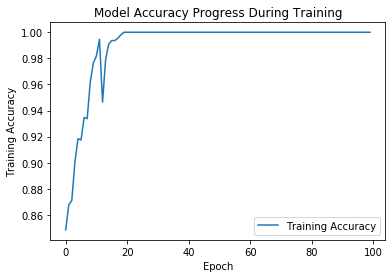

In [79]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

The accuracy goes to around 100% around the same number of epochs, which makes sense.

Let's have a look at the confusion matrix.

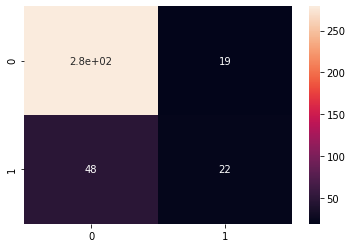

In [80]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

Doesn't look as good as the previous ones...

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       298
           1       0.54      0.31      0.40        70

    accuracy                           0.82       368
   macro avg       0.69      0.63      0.64       368
weighted avg       0.79      0.82      0.80       368



## Conclusion

So far, the LR has been the model that did best.  

However, there are a few things we could have done to maybe change the outcome of the study: the ANN could certainly have better performances if we optimize it more.  

Moreover, the dataset is quite unbalanced. By adding more samples, it might be possible to add some balance to it and improve the results. 